# Importing the requirements

In [56]:
#import the required libraries
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pickle
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
path = "/content/drive/MyDrive/CodeFiles/SunbaseData/customer_churn_large_dataset.xlsx"
Main_dataset = pd.read_excel(path)

In [58]:
Main_dataset.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [59]:
Main_dataset.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [60]:
Main_dataset.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


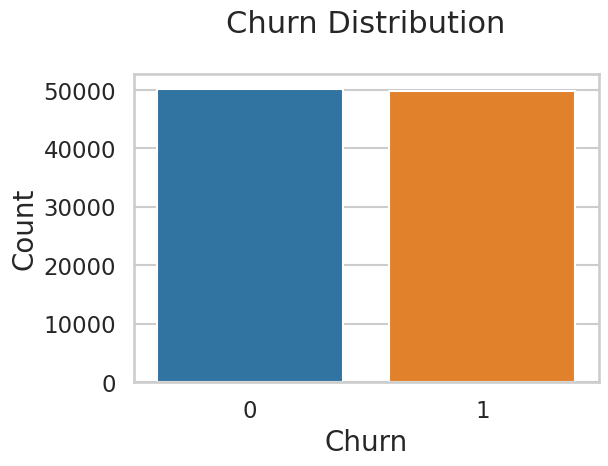

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=Main_dataset)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [62]:
Main_dataset.isnull().sum(), Main_dataset.isna().sum()

(CustomerID                    0
 Name                          0
 Age                           0
 Gender                        0
 Location                      0
 Subscription_Length_Months    0
 Monthly_Bill                  0
 Total_Usage_GB                0
 Churn                         0
 dtype: int64,
 CustomerID                    0
 Name                          0
 Age                           0
 Gender                        0
 Location                      0
 Subscription_Length_Months    0
 Monthly_Bill                  0
 Total_Usage_GB                0
 Churn                         0
 dtype: int64)

In [63]:
dataset = Main_dataset.drop(['CustomerID', 'Name'],axis=1)

In [64]:
# list of categoriacal variables
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O' and  len(Main_dataset[feature].unique()) < 25]

print("Categoriacal Variables Count: {}".format(len(categorical_features)))
categorical_features

Categoriacal Variables Count: 2


['Gender', 'Location']

# EDA and plots

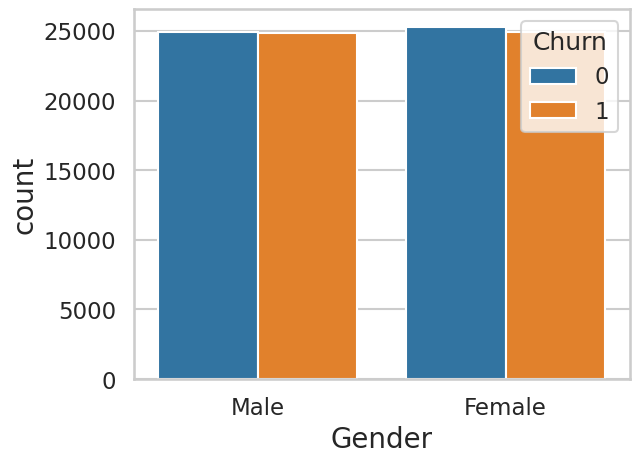

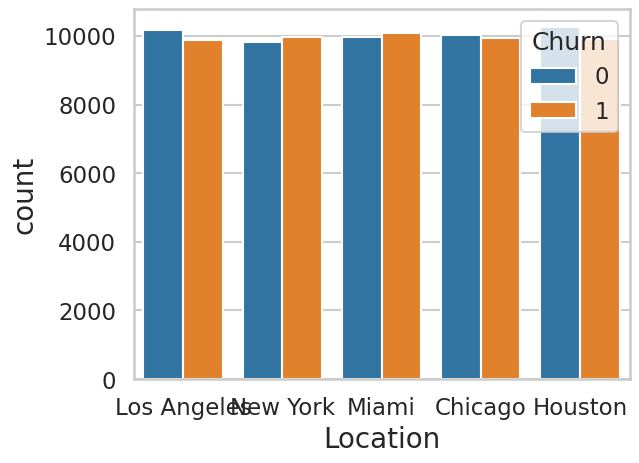

In [65]:
for i, predictor in enumerate(dataset[categorical_features]):
  plt.figure(i)
  sns.countplot(data=dataset, x=predictor, hue ='Churn')

In [66]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
numerical_features

Number of numerical variables:  5


['Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

In [67]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<20 and feature != 'Churn']
print("Discrete Variables Count: {}".format(len(discrete_feature)))

continuous_feature=[feature for feature in numerical_features if len(dataset[feature].unique())>20 and feature != 'Churn']
print("Continous Variables Count: {}".format(len(continuous_feature)))

Discrete Variables Count: 0
Continous Variables Count: 4


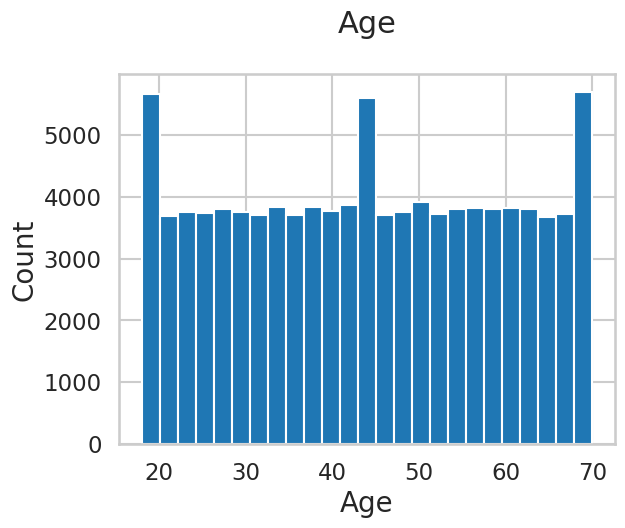

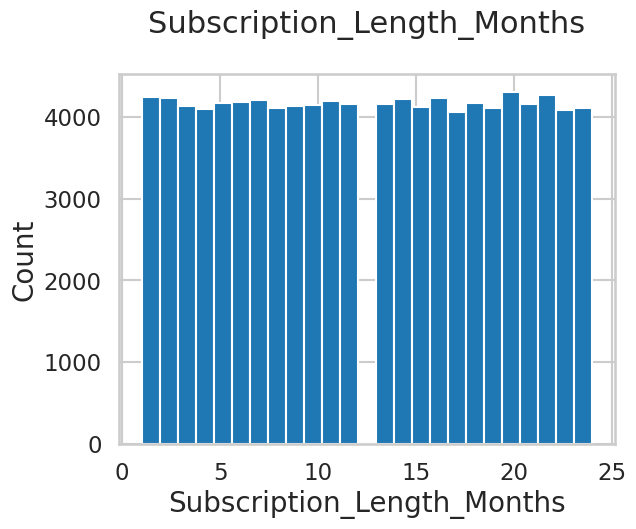

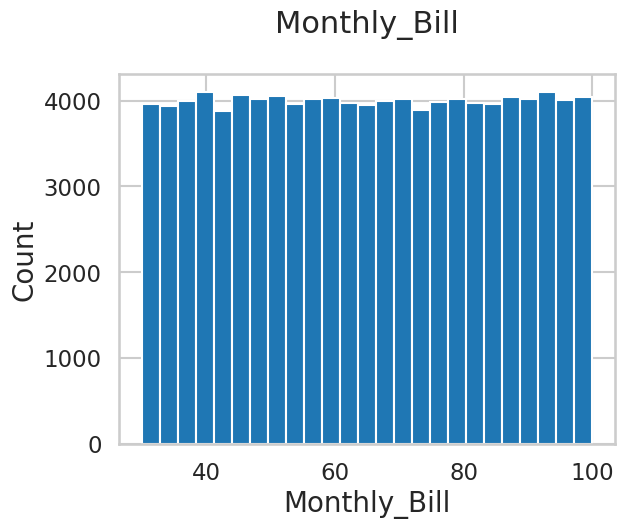

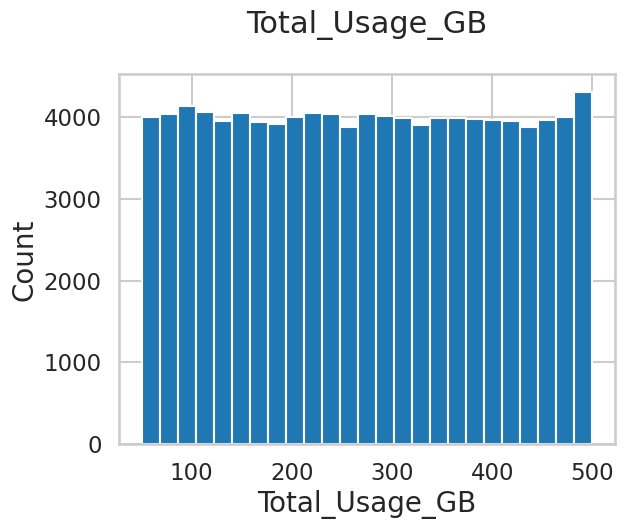

In [68]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [69]:
data=dataset.copy()
for feature in categorical_features:
  labels_ordered=data.groupby([feature])['Churn'].mean().sort_values().index
  labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}

  data[feature]=data[feature].map(labels_ordered)

In [70]:
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,1,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,1,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,0,23,55.13,226,1
99996,62,0,4,19,61.65,351,0
99997,64,1,2,17,96.11,251,1
99998,51,0,4,20,49.25,434,1


<Axes: >

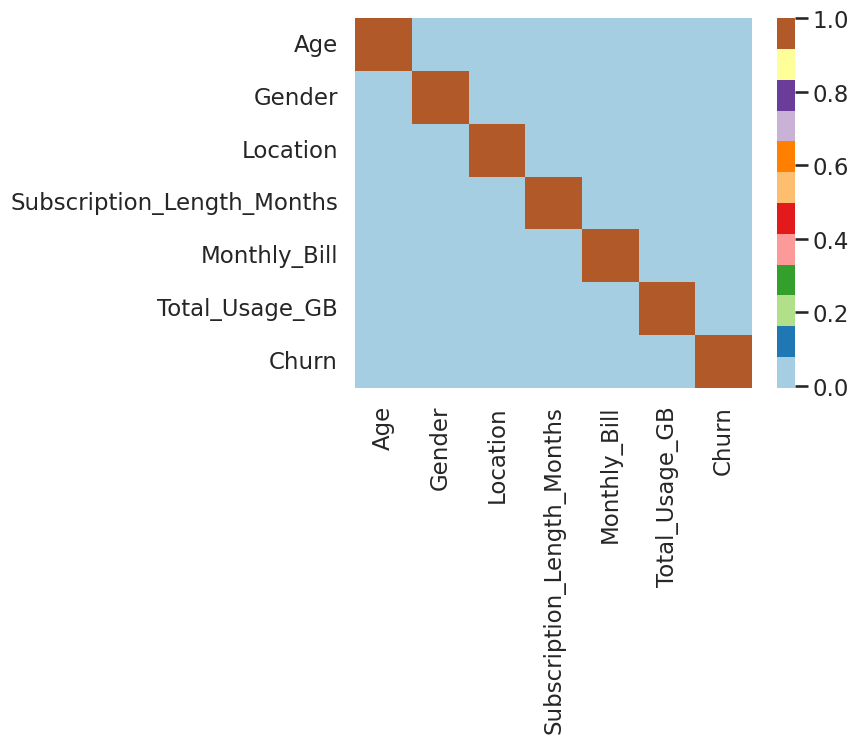

In [71]:
sns.heatmap(data.corr(), cmap="Paired")

In [72]:
new_df1_target0=dataset.loc[dataset["Churn"]==0]
new_df1_target1=dataset.loc[dataset["Churn"]==1]

In [73]:
def uniplot(df,col,title,hue =None):

  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams["axes.labelsize"] = 20
  plt.rcParams['axes.titlesize'] = 22
  plt.rcParams['axes.titlepad'] = 30

  temp = pd.Series(data = hue)
  fig, ax = plt.subplots()
  plt.xticks(rotation=45)
  plt.yscale('log')
  plt.title(title)
  ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index, hue = hue, palette='bright')

  plt.show()

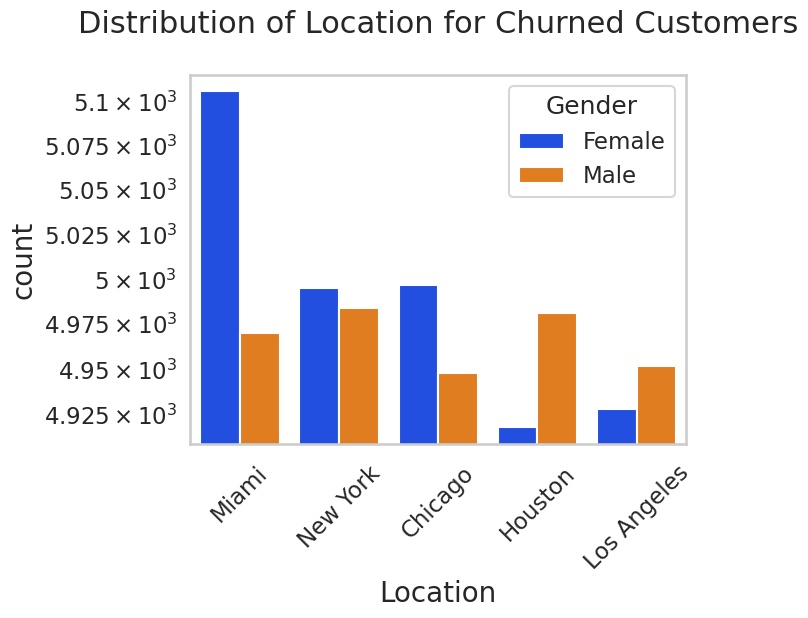

In [74]:
uniplot(new_df1_target1,col='Location',title='Distribution of Location for Churned Customers', hue='Gender')

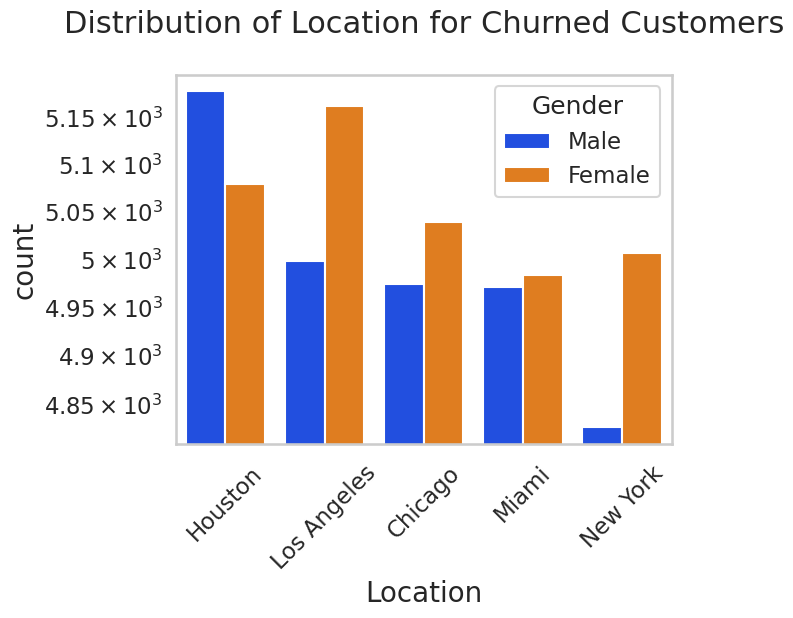

In [75]:
uniplot(new_df1_target0,col='Location',title='Distribution of Location for Churned Customers',hue='Gender')


# Train Test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
features = [feature for feature in data if feature != 'Churn' ]


In [78]:
x= data[features]
y = data["Churn"]

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

(67000, 6)
(67000,)
(33000, 6)
(33000,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Feature Selection

In [80]:
# Define feature selection
from sklearn.feature_selection import f_classif,SelectKBest
fs = SelectKBest(score_func= f_classif, k=3)

In [81]:
# Apply feature selection
fs.fit(x_train, y_train)

SelectKBest(k=3)

In [82]:
# True = Top 5 columns as we mentioned k = 3
# False = Allthe remaining columns excpet k = 3
fs.get_support()

array([ True, False,  True, False,  True, False])

In [83]:
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feat = x_train.columns[(fs.get_support())]
selected_feat

Index(['Age', 'Location', 'Monthly_Bill'], dtype='object')

In [84]:
import math
def list_ceil(x):
    return[math.ceil(i) for i in x]

print("P_Values :")
print(np.round(fs.pvalues_,4))
print("F Values :")
print(fs.scores_)

P_Values :
[0.1944 0.7897 0.0214 0.7265 0.392  0.589 ]
F Values :
[1.68397026 0.07114018 5.29558409 0.12234231 0.73263151 0.2918399 ]


In [85]:
list_ceil(fs.scores_)

[2, 1, 6, 1, 1, 1]

In [86]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(x_train.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(3,columns="Score"))

  Input_Features     Score  P_Value
2       Location  5.295584   0.0214
0            Age  1.683970   0.1944
4   Monthly_Bill  0.732632   0.3920


In [87]:
# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 6
selected features: 3


In [88]:
x_train = x_train[selected_feat]
x_test = x_test[selected_feat]

In [89]:
x_train.head()

,Age,Location,Monthly_Bill
59428,45,0,31.67
34957,68,1,63.26
4264,28,2,53.31
53791,58,3,91.08
82114,56,1,53.19


In [90]:
!pip install catboost -q

# Model building on various standard Classifiers

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error,r2_score,classification_report,confusion_matrix

def train_model(m,name):
    model = m
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(f"\n{name}")
    print(classification_report(y_test, predictions))

train_model(DecisionTreeClassifier(),"Decision Tree Classifier")
train_model(RandomForestClassifier(random_state=3),"Random Forest Classifier")
train_model(XGBClassifier(n_estimators=600),"XGBoost Classifier")
train_model(GradientBoostingClassifier(random_state=1),"Gradient Classifier")
train_model(ExtraTreesClassifier(),"Extra Trees Classifier")
train_model(LogisticRegression(),"Logistic Regression")


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.51      0.51      0.51     16638
           1       0.50      0.50      0.50     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     16638
           1       0.50      0.50      0.50     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     16638
           1       0.49      0.49      0.49     16362

    accuracy                           0.49     33000
   macro avg       0.49      0.49      0.49     33000
we

In light of the consistent 50% accuracy across all classifiers, it is apparent that we need to explore alternative approaches to improve our model building process.

# SMOTE-ENN Method

 This method combines the SMOTE ability to generate synthetic examples for minority class and ENN ability to delete some observations from both classes that are identified as having different class between the observation’s class and its K-nearest neighbor majority class. The process of SMOTE-ENN can be explained as follows

In [92]:
from imblearn.combine import SMOTEENN

In [93]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_train,y_train)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [94]:
def train_model_Smoteenn(m,name):
  xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
  model_dt_smote = m
  model_dt_smote.fit(xr_train,yr_train)
  yr_predict = model_dt_smote.predict(xr_test)
  model_score_r = model_dt_smote.score(xr_test, yr_test)
  print(name)
  print(classification_report(yr_test, yr_predict))

In [95]:
train_model_Smoteenn(DecisionTreeClassifier(),"Decision Tree Classifier")
train_model_Smoteenn(RandomForestClassifier(random_state=3),"Random Forest Classifier")
train_model_Smoteenn(XGBClassifier(n_estimators=600),"XGBoost Classifier")
train_model_Smoteenn(GradientBoostingClassifier(random_state=1),"Gradient Classifier")
train_model_Smoteenn(ExtraTreesClassifier(),"Extra Trees Classifier")
train_model_Smoteenn(LogisticRegression(),"Logistic Regression")

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       870
           1       0.85      0.87      0.86       837

    accuracy                           0.86      1707
   macro avg       0.86      0.86      0.86      1707
weighted avg       0.86      0.86      0.86      1707

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       857
           1       0.89      0.90      0.90       850

    accuracy                           0.90      1707
   macro avg       0.90      0.90      0.90      1707
weighted avg       0.90      0.90      0.90      1707

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       875
           1       0.84      0.88      0.86       832

    accuracy                           0.86      1707
   macro avg       0.86      0.86      0.86      1707
weigh

I have found that using the SMOTEENN technique significantly improves the results, and the Extra Trees Classifier achieved an accuracy of 91% when employed with SMOTEENN. Consequently, I have decided to select it as the ultimate model.

In [96]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote = ExtraTreesClassifier()
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print('Extra Trees Classifier')
print(classification_report(yr_test, yr_predict))

Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       863
           1       0.91      0.93      0.92       844

    accuracy                           0.92      1707
   macro avg       0.92      0.92      0.92      1707
weighted avg       0.92      0.92      0.92      1707



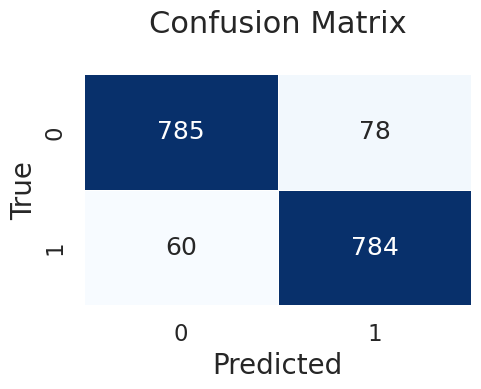

In [113]:
confusion = confusion_matrix(yr_test, yr_predict)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Saving model as a pickle file

In [98]:
import pickle
filename = 'smote_model.pkl'
pickle.dump(model_dt_smote, open(filename, 'wb'))

In [99]:
load_model = pickle.load(open(filename, 'rb'))
model_score_r = load_model.score(xr_test, yr_test)
print('Extra Trees Classifier')
print(classification_report(yr_test, yr_predict))

Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       863
           1       0.91      0.93      0.92       844

    accuracy                           0.92      1707
   macro avg       0.92      0.92      0.92      1707
weighted avg       0.92      0.92      0.92      1707



# Making a preprocessor pipeline

In [100]:
dataset[['Age','Location','Monthly_Bill','Churn']]

,Age,Location,Monthly_Bill,Churn
0,63,Los Angeles,73.36,0
1,62,New York,48.76,0
2,24,Los Angeles,85.47,0
3,36,Miami,97.94,1
4,46,Miami,58.14,0
...,...,...,...,...
99995,33,Houston,55.13,1
99996,62,New York,61.65,0
99997,64,Chicago,96.11,1
99998,51,New York,49.25,1


In [101]:
# Custom Transformer to preprocess categorical features
class CategoricalFeatureProcessor(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.labels_mappings = {}
    for feature in categorical_features:
      labels_ordered = X.groupby([feature])['Churn'].mean().sort_values().index
      self.labels_mappings[feature] = {label: index for index, label in enumerate(labels_ordered)}
    return self

  def transform(self, X):
    X_transformed = X.copy()
    for feature in categorical_features:
      X_transformed[feature] = X_transformed[feature].map(self.labels_mappings[feature])
    return X_transformed

# Define categorical features
categorical_features = ['Location']

# Create a pipeline
pipeline = Pipeline([('categorical_processor', CategoricalFeatureProcessor())])

# Fit and transform the dataset using the pipeline
preprocessed_data = pipeline.fit_transform(dataset[['Age','Location','Monthly_Bill','Churn']])

In [102]:
data[['Age','Location','Monthly_Bill','Churn']]

,Age,Location,Monthly_Bill,Churn
0,63,1,73.36,0
1,62,4,48.76,0
2,24,1,85.47,0
3,36,3,97.94,1
4,46,3,58.14,0
...,...,...,...,...
99995,33,0,55.13,1
99996,62,4,61.65,0
99997,64,2,96.11,1
99998,51,4,49.25,1


In [103]:
preprocessed_data

,Age,Location,Monthly_Bill,Churn
0,63,1,73.36,0
1,62,4,48.76,0
2,24,1,85.47,0
3,36,3,97.94,1
4,46,3,58.14,0
...,...,...,...,...
99995,33,0,55.13,1
99996,62,4,61.65,0
99997,64,2,96.11,1
99998,51,4,49.25,1


In [104]:
fea_df = pd.DataFrame([[45, 'Chicago', 31.67, 0]], columns=['Age', 'Location', 'Monthly_Bill', 'Churn'])

data_scaled = pipeline.transform(fea_df)

data_scaled[['Age', 'Location', 'Monthly_Bill']]

,Age,Location,Monthly_Bill
0,45,2,31.67


In [105]:
fea_df = pd.DataFrame([[45, 'Chicago', 31.67,1 ]], columns=['Age', 'Location', 'Monthly_Bill', 'Churn'])

data_scaled = pipeline.transform(fea_df)

data_scaled[['Age', 'Location', 'Monthly_Bill']]

,Age,Location,Monthly_Bill
0,45,2,31.67


In [106]:
# Save the pipeline to a pickle file
with open('preprocessing_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [107]:
load_Preprocessor = pickle.load(open('preprocessing_pipeline.pkl', 'rb'))

fea_df = pd.DataFrame([[45, 'Chicago', 31.67, 0]], columns=['Age', 'Location', 'Monthly_Bill', 'Churn'])

data_scaled = load_Preprocessor.transform(fea_df)

data_scaled[['Age', 'Location', 'Monthly_Bill']]

,Age,Location,Monthly_Bill
0,45,2,31.67
